## Assignment 3 - Dimensionality Reduction

This assignment is based on content discussed in module 6 and will work with the famous MNIST dataset, which is a set of images of handwritten digits https://en.wikipedia.org/wiki/MNIST_database.
The dataset has been provided to you in a .csv file.

## Learning outcomes

- Apply a Random Forest classification algorithm to MNIST dataset
- Perform dimensionality reduction of features using PCA and compare classification on the reduced dataset to that of original one
- Apply dimensionality reduction techniques: t-SNE and LLE

## Questions (15 points total)

__Question 1 (1 point).__ Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [1]:
from sklearn.datasets import fetch_openml  ##for some reason, cant run fetch_mldata
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import datasets,  metrics
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) 
mnist.data.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
mnist.target.head(5)

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int8

In [4]:
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [5]:
mnist_df=mnist.data
mnist_df['y']=mnist.target

In [6]:
feat_cols = [ 'pixel'+str(i) for i in range(1,X.shape[1]+1) ]

In [7]:
mnist_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


__Question 2 (2 points).__ Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [8]:
from sklearn.ensemble import RandomForestClassifier
import time
t0=time.time()

model_rf1 = RandomForestClassifier(random_state=123)
model_rf1.fit(X_train, y_train)

t1=time.time()
t1

print('RandomForestClassifier done! Time elapsed: {} seconds'.format(t1-t0))

RandomForestClassifier done! Time elapsed: 40.000022649765015 seconds


In [10]:
predicted1=model_rf1.predict(X_test)
expected = y_test

In [9]:
print("Accuracy Score is:\n%s" % model_rf1.score(X_test, y_test))

Accuracy Score is:
0.9697


In [11]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted1))

Confusion matrix:
[[ 969    0    0    0    0    2    4    1    3    1]
 [   0 1123    3    3    0    1    3    1    1    0]
 [   5    0 1001    6    3    0    4    8    5    0]
 [   1    0    8  974    0    9    0    8    7    3]
 [   1    0    1    0  953    0    5    1    2   19]
 [   3    0    1   12    3  855    7    2    6    3]
 [   6    3    0    0    4    3  937    0    5    0]
 [   1    2   17    1    3    0    0  990    3   11]
 [   7    0    5    4    3    6    3    3  932   11]
 [   6    6    1   12    9    3    1    4    4  963]]


In [12]:
print("Classification report for classifier %s:\n%s\n"
      % (model_rf1, metrics.classification_report(expected, predicted1)))

Classification report for classifier RandomForestClassifier(random_state=123):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000




The accuracy for Random Forest model is quite high to 97%

__Question 3 (4 points).__ Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [13]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [14]:
pca.n_components_ 

154

In [15]:
# define the model
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
t2=time.time()


steps = [('pca', PCA(n_components=154)), ('m', RandomForestClassifier(random_state=123))]
model_rf2 = Pipeline(steps=steps)
# fit the model on the whole dataset
model_rf2.fit(X_train, y_train)


t3=time.time()


print('PCA done! Time elapsed: {} seconds'.format(t3-t2))

PCA done! Time elapsed: 95.75499677658081 seconds


Compare to Question2, The time is over doubled/

In [16]:
predicted2 = model_rf2.predict(X_test)
expected2 = y_test

In [17]:
print("Accuracy Score is:\n%s"
      % model_rf2.score(X_test, y_test))

Accuracy Score is:
0.948


In [18]:
print("Classification report for classifier %s:\n%s\n"
      
      
      % (model_rf2, metrics.classification_report(expected2, predicted2)))

Classification report for classifier Pipeline(steps=[('pca', PCA(n_components=154)),
                ('m', RandomForestClassifier(random_state=123))]):
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.93      0.94      0.94      1010
           4       0.94      0.95      0.95       982
           5       0.93      0.93      0.93       892
           6       0.96      0.98      0.97       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.91      0.92       974
           9       0.93      0.92      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000




The accuracy is decreased as well from 97% to 95%. so sometimes PCA is not working all the time. It may make the model even worse

__Question 4 (4 points).__ Use t-SNE to reduce the MNIST dataset, show result graphically.

In [19]:
# YOUR CODE HERE

N=10000
np.random.seed(42)
rndperm = np.random.permutation(mnist_df.shape[0])

mnist_df_subset = mnist_df.loc[rndperm[:N],:].copy()
data_subset = mnist_df_subset[feat_cols].values




time_4 = time.time()

# import TSNE from sklearn
from sklearn.manifold import TSNE
pca_2 = PCA(n_components=2)
pca_result_train = pca_2.fit_transform(data_subset)

mnist_df_subset['pca-one'] = pca_result_train[:,0]
mnist_df_subset['pca-two'] = pca_result_train[:,1] 
time_5 = time.time()
print('PCA 2 components done! Time elapsed: {} seconds'.format(time_5-time_4))
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))


time_6 = time.time()

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

tsne_result = tsne.fit_transform(data_subset)
time_7 = time.time()

print('t-SNE done! Time elapsed: {} seconds'.format(time_7-time_6))

PCA 2 components done! Time elapsed: 0.2440013885498047 seconds
Explained variation per principal component: [0.09819946 0.07123677]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.010s...
[t-SNE] Computed neighbors for 10000 samples in 4.128s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 438.329018
[t-SNE] KL divergence

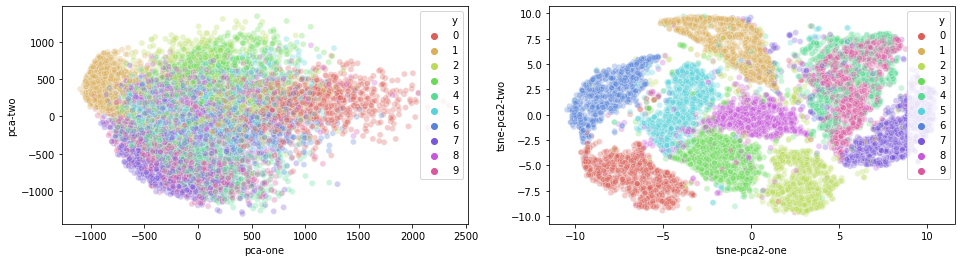

In [20]:
#Compare Scatter Plots of two approach PCA2 and TSNE
mnist_df_subset['tsne-pca2-one'] = tsne_result[:,0]
mnist_df_subset['tsne-pca2-two'] = tsne_result[:,1]

plt.figure(figsize=(16,4))


ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(    
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=mnist_df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-pca2-one", y="tsne-pca2-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=mnist_df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)




T-SNE is clustering the data better quite well so far with 2 dimensions.

__Question 5 (4 points).__ Compare with other dimensionality methods: _Locally Linear Embedding_ (LLE) or _Multidimensional scaling_ (MDS).

In [21]:
# YOR CODE HERE

from sklearn.manifold import LocallyLinearEmbedding
time_6 = time.time()

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=41)
lle_result = lle.fit_transform(data_subset)

time_7 = time.time()

print('LLE done! Time elapsed: {} seconds'.format(time_7-time_6))

LLE done! Time elapsed: 94.62239170074463 seconds


The time to run LLE is tripled compare to T-SNE

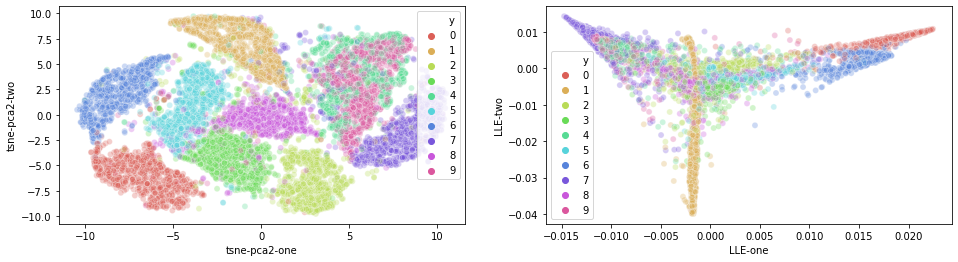

In [23]:
#Compare TSNE with LLE
mnist_df_subset['LLE-one'] = lle_result[:,0]
mnist_df_subset['LLE-two'] = lle_result[:,1]
plt.figure(figsize=(16,4))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="tsne-pca2-one", y="tsne-pca2-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=mnist_df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="LLE-one", y="LLE-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=mnist_df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)



Compare to TSNE with LLE, TSNE cluster the data better, grouped the data properly